In [1]:
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.metrics import classification_report
from collections import Counter



In [2]:
X, y = make_classification(n_samples=100000, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=2,
                           n_clusters_per_class=1,
                           weights=[0.995,0.005],
                           class_sep=0.5, random_state=32)

#Convert the data from numpy array to a pandas dataframe
df = pd.DataFrame({'feature1': X[:, 0], 'feature2': X[:, 1], 'target': y})

#Check the target distribution
df['target'].value_counts(normalize = True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

contagem_classe = Counter(y_train)
classe_maior, cont_classe_maior = sorted(contagem_classe.items())[0]
classe_menor, cont_classe_menor = sorted(contagem_classe.items())[-1]
print(f'A classe majoritária é {classe_maior} com {cont_classe_maior} registros ')
print(f'A classe minoritaria é {classe_menor} com {cont_classe_menor} registros ')

detector = OneClassSVM(nu=0.05, kernel='rbf', gamma='auto')
detector.fit(X_train)

predicao = detector.predict(X_test)
predicao = np.where(predicao == -1, 1, 0)

print(classification_report(y_test, predicao))

A classe majoritária é 0 com 79185 registros 
A classe minoritaria é 1 com 815 registros 
              precision    recall  f1-score   support

           0       0.99      0.95      0.97     19804
           1       0.01      0.08      0.02       196

    accuracy                           0.94     20000
   macro avg       0.50      0.51      0.50     20000
weighted avg       0.98      0.94      0.96     20000



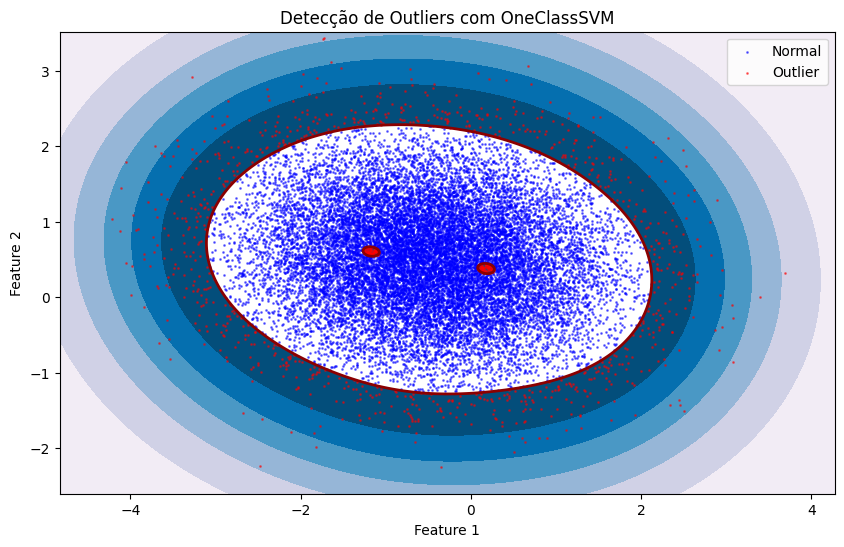

In [3]:
# Plotar os resultados
plt.figure(figsize=(10, 6))


# Plotar o kernel do SVM (regiões de decisão)
xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 500),
                     np.linspace(X[:, 1].min(), X[:, 1].max(), 500))
Z = detector.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
plt.scatter(X_test[predicao == 0][:, 0], X_test[predicao == 0][:, 1],
            c='blue', label='Normal', alpha=0.5, s=1)
plt.scatter(X_test[predicao == 1][:, 0], X_test[predicao == 1][:, 1],
            c='red', label='Outlier', alpha=0.5, s=1)
plt.title('Detecção de Outliers com OneClassSVM')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()